In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import datetime as dt

## Sentiment analysis

In [26]:
sentiment_df = pd.read_csv('./data/sentiment_df.csv')
sentiment_df.head()

,quoteID,quotation,speaker,date,numOccurrences,neg,neu,pos,compound,date_clean
0,2015-01-01-041284,With major new premium services from Apple and...,Geoff Taylor,2015-01-01 00:01:00,3,0.0,0.854,0.146,0.5859,2015-01-01
1,2015-01-01-032875,They realize that they just can't assume that ...,Angus King,2015-01-01 00:14:24,1,0.0,0.892,0.108,0.6369,2015-01-01
2,2015-01-01-036563,We feel that there are a substantial number of...,William Anderson,2015-01-01 01:30:18,1,0.0,0.795,0.205,0.2732,2015-01-01
3,2015-01-01-041777,You can play a murderer's row but in conferenc...,Jim Crews,2015-01-01 02:47:17,1,0.0,0.769,0.231,0.5859,2015-01-01
4,2015-01-01-039665,"We've also, surprisingly, had a lot of Apple r...",Daniel Williams,2015-01-01 04:10:31,1,0.0,0.804,0.196,0.2960,2015-01-01


In [8]:
# Try aggregate on weekly values, i.e. 7 days
# Based on how much they contribute increase size of scatter plot circle
agg_month_sentiment = []
agg_month_dates = []

for index, (idx, row) in enumerate(sentiment_df.iterrows()):
    date = row['date_clean']
    if index == 0:
        current_month = date[:7]
        current_size = 0

    tmp_month = current_month
    current_month = date[:7] # the seven first digits of the date
    if tmp_month != current_month:
        agg_month_sentiment.append(current_size)
        current_size = 0
        agg_month_dates.append(current_month)
    
    # updates weighted aggregated value of positive and negative
    current_size += row['compound'] #*row['numOccurrences']

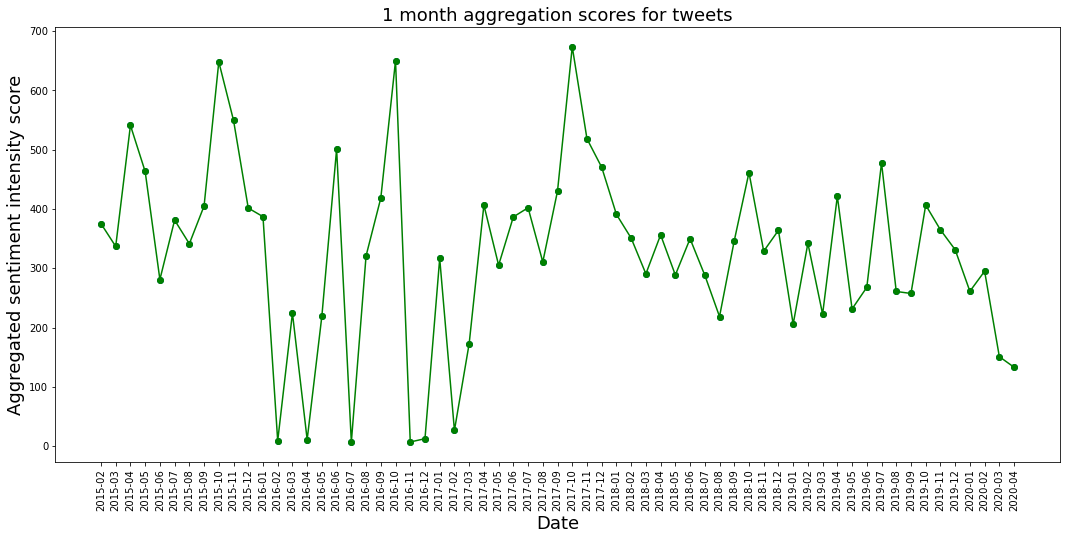

In [9]:
fig,ax = plt.subplots(figsize=(18,8))
result_values = []
result_mon = []
for mon, agg in zip(agg_month_dates, agg_month_sentiment):
    result_values.append(agg)
    result_mon.append(mon)

        

ax.scatter(result_mon, result_values)

ax.plot(result_mon, result_values, '-o', color='green')
plt.title('1 month aggregation scores for tweets', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Aggregated sentiment intensity score', fontsize=18)

#ax.plot(agg_month_dates, agg_month_sentiment)
plt.xticks(rotation=90);

## Stock analysis

In [66]:
stock_data=pd.read_csv('./data/AAPL_2015_to_2020_yahoo_finance.csv')
apple_event_and_stock_data=pd.read_csv('./data/events_dates_with_stock_data.csv')
apple_earnings_and_stock_data=pd.read_csv('./data/earnings_dates_with_stock_data.csv')

### Group by week

In [25]:
stock_data_weekly_average=stock_data.copy()

#Create a new dataframe containing the weekly average of the stock price. The method is obtained from
stock_data_weekly_average.Date = pd.to_datetime(stock_data_weekly_average.Date) - pd.to_timedelta(7, unit='d')
stock_data_weekly_average = stock_data_weekly_average.groupby([pd.Grouper(key='Date', freq='W-MON')]).mean().reset_index().sort_values('Date')
stock_data_weekly_average.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-29,27.46000,27.511251,26.595000,26.947500,24.397426,234980200.0
1,2015-01-05,27.41200,27.683000,26.952000,27.358000,24.769084,214894240.0
2,2015-01-12,27.34375,27.558125,26.829375,27.051875,24.491926,254575800.0
3,2015-01-19,27.65450,28.030500,27.441000,27.837500,25.203208,203481600.0
4,2015-01-26,29.14100,29.448001,28.641500,28.957000,26.216769,378373440.0


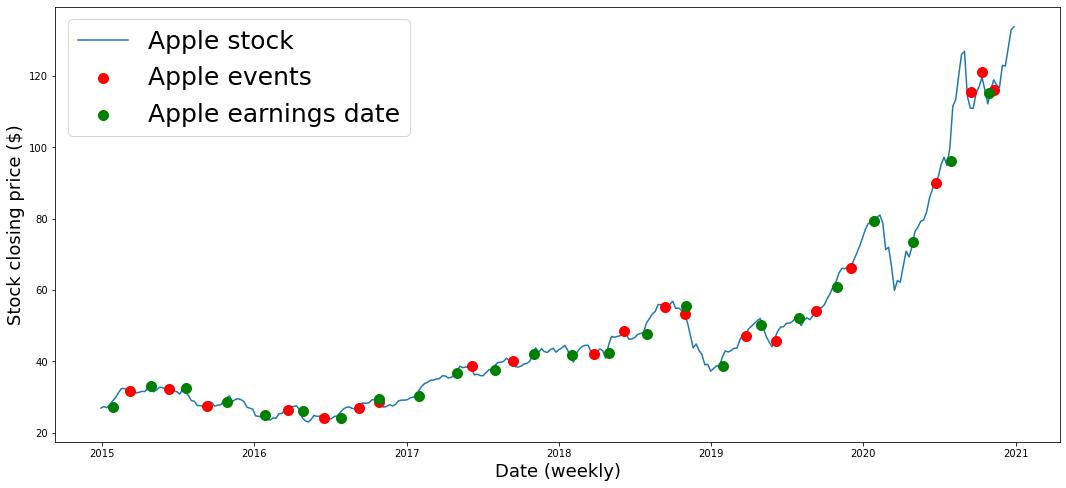

In [19]:
#Plots the weekly average
fig,ax = plt.subplots(figsize=(18,8))
ax.plot(stock_data_weekly_average.Date,stock_data_weekly_average.Close, label='Apple stock')
apple_events=ax.set_xlabel("Date (weekly)",size=18)
ax.set_ylabel('Stock closing price ($)', size=18)
ax.scatter(apple_event_and_stock_data.Date, apple_event_and_stock_data.Close, c="r", s=100, zorder=3, label='Apple events')
ax.scatter(apple_earnings_and_stock_data.Date, apple_earnings_and_stock_data.Close, c="g", s=100, zorder=3, label='Apple earnings date')
ax.legend(prop={'size': 25})
plt.show();

### Stock monthly change

In [84]:
stock_data["Date"]=stock_data['Date'].apply(lambda x: dt.datetime.strptime(x[:10], '%Y-%m-%d'))

In [126]:
monthly_stock_diff_df=pd.DataFrame(stock_data.groupby(pd.Grouper(key='Date', freq="M")).first()["Open"]-stock_data.groupby(pd.Grouper(key='Date', freq="M")).last()["Close"], columns=["price_difference"])

In [127]:
monthly_stock_diff_df.head()

,price_difference
Date,
2015-01-31,-1.442501
2015-02-28,-2.602501
2015-03-31,1.205000
2015-04-30,-0.082500
2015-05-31,-1.045000


`monthly_diff` displays the monthly price change off the Apple-stock.

### Sentiment monthly change

In [128]:
sentiment_monthly_df=pd.DataFrame(zip(result_mon, result_values), columns =['Date', 'Values'])
sentiment_monthly_df['Date'] = sentiment_monthly_df['Date'].apply(lambda x: dt.datetime.strptime(x[:10], '%Y-%m'))

In [129]:
from pandas.tseries.offsets import DateOffset

sentiment_monthly_df['Date']=sentiment_monthly_df['Date']-DateOffset(days=1)

In [130]:
sentiment_monthly_df.head()

,Date,Values
0,2015-01-31,375.3895
1,2015-02-28,336.9674
2,2015-03-31,541.0418
3,2015-04-30,463.2872
4,2015-05-31,281.1544


In [133]:
stock_price_sentiment = pd.merge(monthly_stock_diff_df, sentiment_monthly_df, how='inner', on = 'Date')

In [134]:
stock_price_sentiment.head()

,Date,price_difference,Values
0,2015-01-31,-1.442501,375.3895
1,2015-02-28,-2.602501,336.9674
2,2015-03-31,1.205000,541.0418
3,2015-04-30,-0.082500,463.2872
4,2015-05-31,-1.045000,281.1544


## Combine stock and sentiment analysis

### Convert sentiment

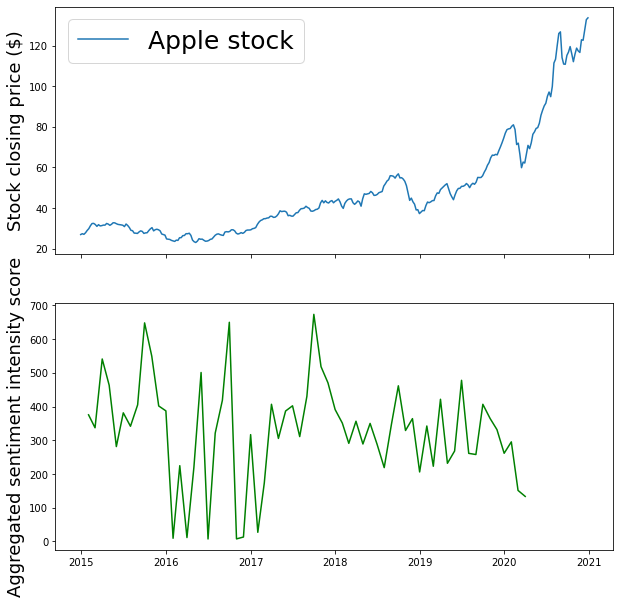

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10))
ax1.plot(stock_data_weekly_average.Date,stock_data_weekly_average.Close, label='Apple stock')
apple_events=ax.set_xlabel("Date (weekly)",size=18)
ax1.set_ylabel('Stock closing price ($)', size=18)
#ax1.scatter(apple_event_and_stock_data.Date, apple_event_and_stock_data.Close, c="r", s=100, zorder=3, label='Apple events')
#ax1.scatter(apple_earnings_and_stock_data.Date, apple_earnings_and_stock_data.Close, c="g", s=100, zorder=3, label='Apple earnings date')
ax1.legend(prop={'size': 25})

ax2.plot(sentiment_monthly_df.Month, sentiment_monthly_df.Values, color='green')
#plt.title('1 month aggregation scores for tweets', fontsize=18)
#plt.xlabel('Date', fontsize=18)
ax2.set_ylabel('Aggregated sentiment intensity score', fontsize=18)
plt.show();


In [50]:
#import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
#url = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol=AAPL&apikey=365GVP2T1B223DFN'
#r = requests.get(url)
#data = r.json()

#print(data)